In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
%matplotlib inline

## #1 Noisy data

In [157]:
df_noisy = pd.read_csv("/content/sample_data/noisy_data.csv")

#### Data exploration and preparation

In [185]:
df_noisy.head(10)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [203]:
features, label = df_noisy.iloc[:, :-1].values, df_noisy.iloc[:,-1].values

In [202]:
label = df_noisy.iloc[:,-1].values

In [188]:
features[:,1:3]

array([[49.0, 86400.0],
       [32.0, 57600.0],
       [35.0, 64800.0],
       [43.0, 73200.0],
       [45.0, nan],
       [40.0, 69600.0],
       [nan, 62400.0],
       [53.0, 94800.0],
       [55.0, 99600.0],
       [42.0, 80400.0]], dtype=object)

###Imputation

In [190]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features[:,1:3] = imputer.fit_transform(features[:,1:3])
features[:,1:3]

array([[49.0, 86400.0],
       [32.0, 57600.0],
       [35.0, 64800.0],
       [43.0, 73200.0],
       [45.0, 76533.33333333333],
       [40.0, 69600.0],
       [43.77777777777778, 62400.0],
       [53.0, 94800.0],
       [55.0, 99600.0],
       [42.0, 80400.0]], dtype=object)

In [195]:
imputed_feature_df = pd.DataFrame(features, columns=df_noisy.columns.drop("Online Shopper"))
imputed_feature_df

,Region,Age,Income
0,India,49.0,86400.0
1,Brazil,32.0,57600.0
2,USA,35.0,64800.0
3,Brazil,43.0,73200.0
4,USA,45.0,76533.333333
5,India,40.0,69600.0
6,Brazil,43.777778,62400.0
7,India,53.0,94800.0
8,USA,55.0,99600.0
9,India,42.0,80400.0


###Normality

In [226]:
from scipy.stats import  shapiro, normaltest

In [200]:
data = df_noisy.select_dtypes('number')
for col in data.columns:
  stat, result = shapiro(imputed_feature_df[col])
  if(result > 0.05):
    print(f"{col} is normally distributed with pValue: {result}")
  else:
    print(f"{col} is not normally distributed with pValue {result}")

Age is normally distributed with pValue: 0.9016733765602112
Income is normally distributed with pValue: 0.8148082494735718


In [204]:
data = df_noisy.select_dtypes('number')
for col in data.columns:
  stat, result = normaltest(imputed_feature_df[col])
  if(result > 0.05):
    print(f"{col} is normally distributed {stat} {result}")
  else:
    print(f"{col} is not normally distributed {stat} {result}")

Age is normally distributed 0.03788194964980586 0.9812372782356981
Income is normally distributed 0.704622242248985 0.7030613507079047


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Above warning indicates that the test should be used only of dateset having more than 20 values but our dataset is typical one consisting of 10 records. <br>  It is just a warning and not an error. 

#### Hypothesis

- If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian. <br />
- If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.

<p>In out dataset we have Age and Income having p-value > 0.05 so we assume the distribution to be normal </p>

#### Visualization of normality

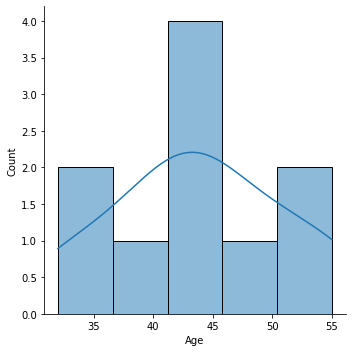

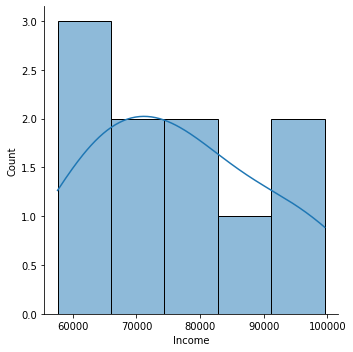

In [225]:
for index, col in enumerate(df_noisy.select_dtypes('number')):
  sns.displot(data=imputed_feature_df, x=col, kde=True)

### Encoding

##### One hot encoding the features

In [124]:
transformer = ColumnTransformer([('one_hot_encoding', OneHotEncoder(), [0])], remainder='passthrough')
features = transformer.fit_transform(features)
features

array([[0.0, 1.0, 0.0, 49.0, 86400.0],
       [1.0, 0.0, 0.0, 32.0, 57600.0],
       [0.0, 0.0, 1.0, 35.0, 64800.0],
       [1.0, 0.0, 0.0, 43.0, 73200.0],
       [0.0, 0.0, 1.0, 45.0, 76533.33333333333],
       [0.0, 1.0, 0.0, 40.0, 69600.0],
       [1.0, 0.0, 0.0, 43.77777777777778, 62400.0],
       [0.0, 1.0, 0.0, 53.0, 94800.0],
       [0.0, 0.0, 1.0, 55.0, 99600.0],
       [0.0, 1.0, 0.0, 42.0, 80400.0]], dtype=object)

##### Binarizing the label

In [125]:
label 


array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [134]:
label = np.array(LabelBinarizer().fit_transform(label)).reshape(1, len(label))[0]
label

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Feature scaling

In [135]:
scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)
features_scaled

array([[0.        , 1.        , 0.        , 0.73913043, 0.68571429],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.13043478, 0.17142857],
       [1.        , 0.        , 0.        , 0.47826087, 0.37142857],
       [0.        , 0.        , 1.        , 0.56521739, 0.45079365],
       [0.        , 1.        , 0.        , 0.34782609, 0.28571429],
       [1.        , 0.        , 0.        , 0.51207729, 0.11428571],
       [0.        , 1.        , 0.        , 0.91304348, 0.88571429],
       [0.        , 0.        , 1.        , 1.        , 1.        ],
       [0.        , 1.        , 0.        , 0.43478261, 0.54285714]])

## #2 Wiki data

In [ ]:
import nltk
nltk.download('punkt') # required for word_tokenize
nltk.download('stopwords')  

In [236]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

In [248]:
def remove_stop_words_and_punctuations(tokens):
  punctuations = ["[", "]", ",", ".", '"', "`", "'", "``", "''", '``', '?',  '?".']
  stopwords_en.extend(punctuations)
  return [token for token in tokens if token not in stopwords_en]

###### word_tokenize

In [259]:
from nltk.tokenize import word_tokenize

with open("/content/sample_data/wiki.txt") as f:
  for line in f.readlines():
    tokens_all =  word_tokenize(line.lower())
    tokens_wo_stopwords = remove_stop_words_and_punctuations(tokens_all)
    print(tokens_wo_stopwords)

['history', 'nlp', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'alan', 'turing', 'published', 'article', 'titled', 'computing', 'machinery', 'intelligence', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligence']
[]
['georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentences', 'english', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem', '2', 'however', 'real', 'progress', 'much', 'slower', 'alpac', 'report', '1966', 'found', 'ten-year-long', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed']
[]
['notably', 'successful', 'nlp', 'systems', 'developed', '1960s', 'shrdlu', 'natural-language', 'system'

##### RegexpTokenizer

In [260]:
from nltk.tokenize import RegexpTokenizer
with open("/content/sample_data/wiki.txt") as f:
  for line in f.readlines():
    tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
    tokens_all = tokenizer.tokenize(line.lower())
    tokens_wo_stopwords = remove_stop_words_and_punctuations(tokens_all)
    print(tokens_wo_stopwords)

['history', 'nlp', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'alan', 'turing', 'published', 'article', 'titled', '"computing', 'machinery', 'intelligence', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligence']
[]
['georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentences', 'english', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem', '.[2]', 'however', 'real', 'progress', 'much', 'slower', 'alpac', 'report', '1966', 'found', 'ten', '-year-long', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed']
[]
['notably', 'successful', 'nlp', 'systems', 'developed', '1960s', 'shrdlu', 'natural', '-languag

##### extract dates

In [233]:
import re
with open("/content/sample_data/wiki.txt") as f:
  data = f.read()
  print(re.findall('(\d{4})+', data))

['1950', '1950', '1954', '1966', '1980', '1960', '1964', '1966']


##### differences



``RegexpTokenizer`` and `word_tokenize` are both functions from the `Natural Language Toolkit (NLTK)` library in Python. They are used to tokenize text into words, but they have some differences:

`RegexpTokenizer` is a regular expression based tokenizer. It splits a string into tokens based on a regular expression pattern that we provide. This makes it highly customizable, as we can define our own pattern to match words or other tokens. For example, we can use a regular expression pattern to split a string on whitespace and punctuation.

`word_tokenize` is a more general-purpose tokenizer. It takes into account several factors such as punctuation, capitalization, and abbreviations to split a string into words. The algorithm is based on the `Punkt` tokenization algorithm, which is trained on a large corpus of text in many different languages. This makes `word_tokenize` well suited for most general-purpose text tokenization tasks, but it may not work as well for specific cases where we need a custom tokenization pattern.

In conclusion, `RegexpTokenizer` is a good choice when we need a custom tokenization pattern, while `word_tokenize` is a good choice for general-purpose text tokenization.


## #3 Melbourne-housing

#### Data exploration and preparation

In [251]:
df = pd.read_csv("/content/sample_data/melb_data.csv")

In [250]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [11]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [14]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [15]:
df.shape

(13580, 21)

In [16]:
df1 = df.dropna()
df1.shape

(6196, 21)

In [17]:
df1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [60]:
df1_subset = df1.select_dtypes(['number'])
df1_subset.shape

(6196, 13)

In [47]:
features = df1_subset[df1_subset.columns.drop('Price')]
label = df1_subset['Price']
features.shape, label.shape

((6196, 12), (6196,))

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

### visualization

In [252]:
def plot_data( x_data, y_data, x_name="features", y_name="", sortBy=""):
  data = pd.DataFrame({ x_name: x_data, y_name: y_data })
  data.sort_values(by=sortBy, inplace=True, ascending=True)
  plt.figure(figsize=(20, 8))
  sns.barplot(data=data, x=x_name, y=y_name)

##### f_regression Correlation

<Figure size 1440x576 with 0 Axes>

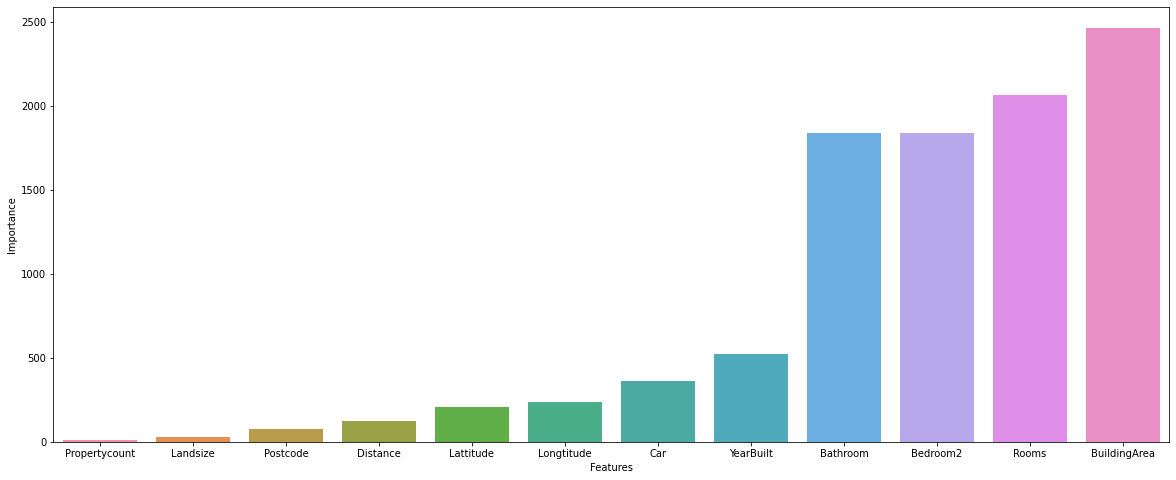

In [255]:
from sklearn.feature_selection import SelectKBest, f_regression

fr = SelectKBest(f_regression, k='all')
fr.fit(x_train, y_train).transform(x_train)
plt.figure(figsize=(20, 8))
plot_data(x_data= x_train.columns, y_data=fr.scores_, x_name="Features", y_name="Importance", sortBy="Importance")
plt.show()


##### chi square

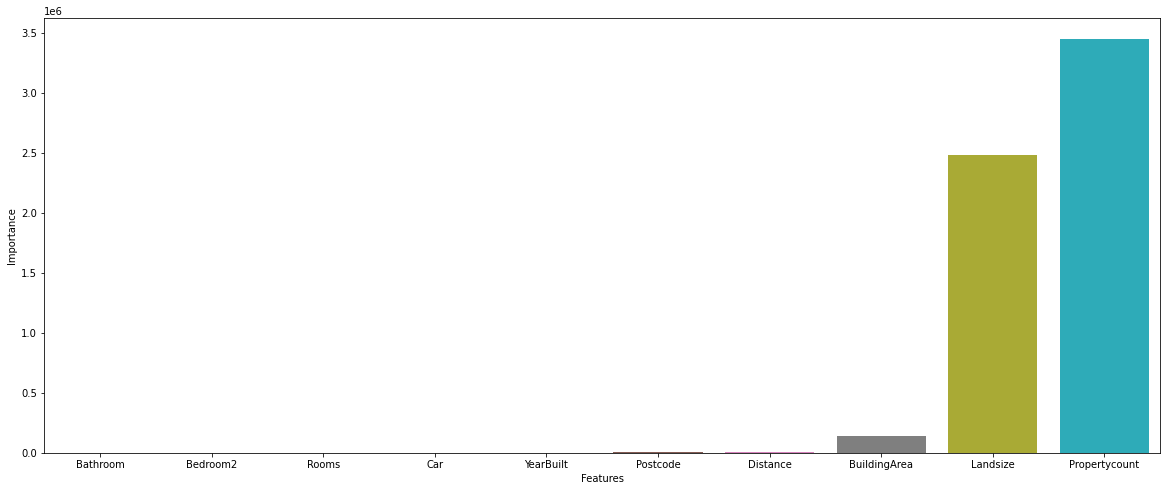

In [256]:
from sklearn.feature_selection import SelectKBest, chi2

x1_train = x_train[x_train.columns.drop((['Lattitude','Longtitude']))]
x1_train_selected = SelectKBest(chi2, k='all').fit(x1_train, y_train)
plot_data(x_data= x1_train.columns, y_data=x1_train_selected.scores_, x_name="Features", y_name="Importance", sortBy="Importance")
plt.show()


##### RandomForestRegressor

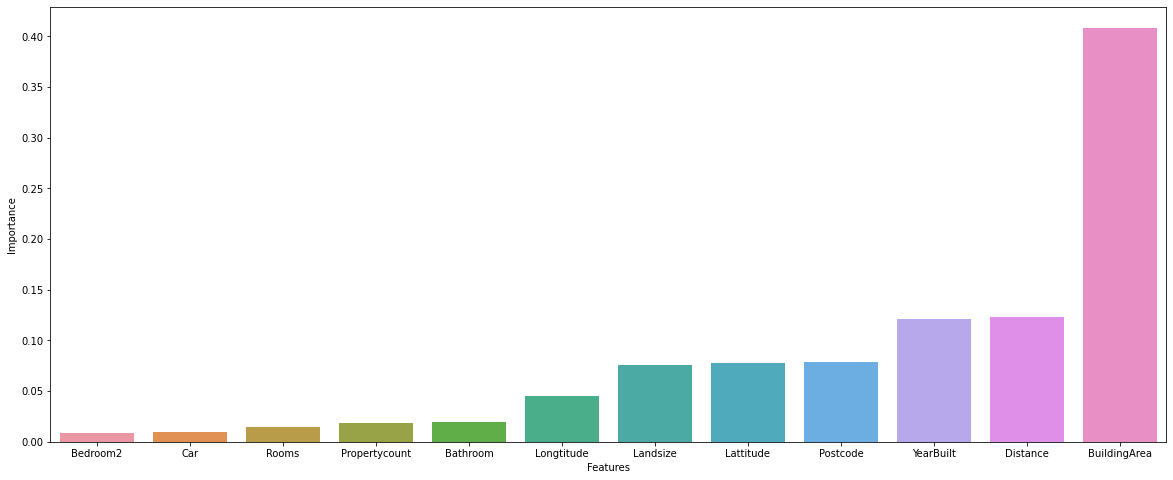

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest

frs = df1_subset[df1_subset.columns.drop('Price')]
lbl = df1_subset['Price']

rfr = RandomForestRegressor().fit(frs, lbl)
data = pd.DataFrame({ "features": features.columns, "importance": rfr.feature_importances_ })
data.sort_values(by='importance', inplace=True, ascending=True)
plot_data(x_data=data['features'], y_data=data['importance'], x_name="Features", y_name="Importance", sortBy="Importance")

##### mutual_info_regression

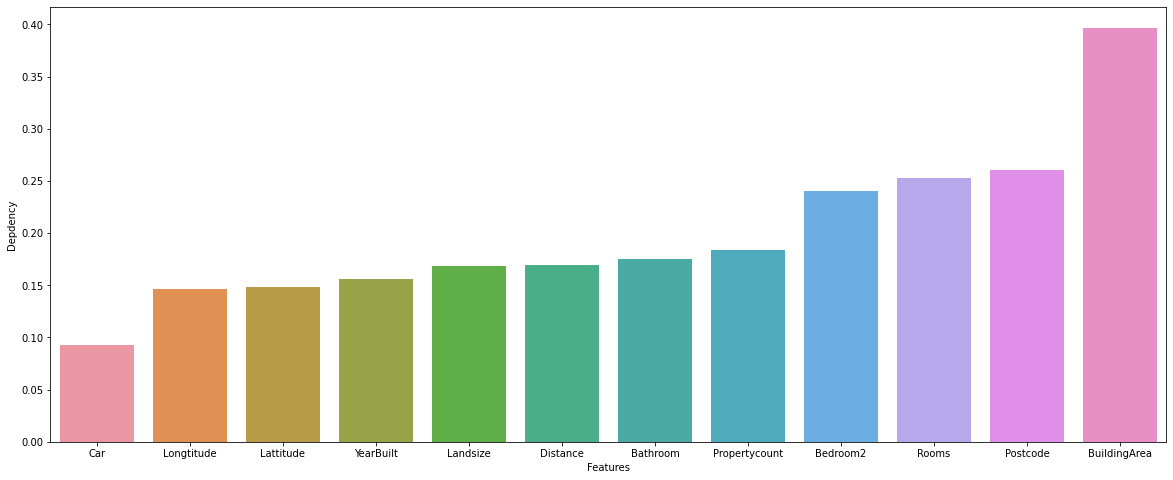

In [258]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

features = df1_subset[df1_subset.columns.drop('Price')]
label = df1_subset['Price']
features.shape, label.shape
fs = SelectKBest(mutual_info_regression, k='all')
fs.fit(features, label)
plot_data(x_data=features.columns, y_data=fs.scores_, x_name="Features", y_name="Depdency", sortBy="Depdency")
plt.show()

##### Analysis

Best:

- Random Forest: Random Forest is a flexible technique that can handle non-linear relationships and complex interactions between features. It can also provide an estimate of feature importance, which can be useful for interpreting the results of the model.

- Correlation-based Feature Selection: If the relationships between the features and the target variable are relatively straightforward, this technique can be an effective and efficient way to select the most important features.

Worst:

- chi-squared tests: it may not perform well in the presence of complex relationships or interactions between features.
